In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

# multicollinerity

In [18]:
data = pd.read_csv('./data/processed_data_120.csv')
data.drop(columns=['target_sunspots'], inplace=True)
data

,sunspots,dates,year,month,lag_1_sunspots,lag_2_sunspots,lag_3_sunspots,lag_4_sunspots,lag_5_sunspots,lag_6_sunspots,...,lag_36_sunspots,avg_3_sunspots,avg_6_sunspots,avg_12_sunspots,avg_24_sunspots,avg_36_sunspots,roll_max_sunspots,roll_min_sunspots,roll_avg_sunspots,target_dates
0,35.0,1752-01-31,1752,1,44.0,28.5,23.2,23.5,59.8,66.3,...,58.0,35.833333,35.666667,44.741667,63.929167,70.019444,158.6,23.2,69.694595,1762-01-31
1,50.0,1752-02-29,1752,2,35.0,44.0,28.5,23.2,23.5,59.8,...,62.6,43.000000,34.033333,45.283333,62.850000,69.669444,158.6,23.2,69.176316,1762-02-28
2,71.0,1752-03-31,1752,3,50.0,35.0,44.0,28.5,23.2,23.5,...,70.0,52.000000,41.950000,47.425000,62.091667,69.697222,158.6,23.2,69.223077,1762-03-31
3,59.3,1752-04-30,1752,4,71.0,50.0,35.0,44.0,28.5,23.2,...,55.7,60.100000,47.966667,47.666667,60.883333,69.797222,158.6,23.2,68.975000,1762-04-30
4,59.7,1752-05-31,1752,5,59.3,71.0,50.0,35.0,44.0,28.5,...,85.0,63.333333,53.166667,47.583333,59.620833,69.094444,158.6,23.2,68.748780,1762-05-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2659,25.6,1973-08-31,1973,8,23.1,39.5,42.4,57.7,46.0,42.9,...,93.0,29.400000,39.050000,44.400000,58.129167,64.233333,253.8,0.0,49.941914,1983-08-31
2660,59.3,1973-09-30,1973,9,25.6,23.1,39.5,42.4,57.7,46.0,...,99.5,36.000000,41.266667,44.008333,58.508333,63.116667,253.8,0.0,49.945384,1983-09-30
2661,30.7,1973-10-31,1973,10,59.3,25.6,23.1,39.5,42.4,57.7,...,86.6,38.533333,36.766667,41.458333,57.633333,61.563889,253.8,0.0,49.938251,1983-10-31
2662,23.9,1973-11-30,1973,11,30.7,59.3,25.6,23.1,39.5,42.4,...,95.2,37.966667,33.683333,39.983333,55.995833,59.583333,253.8,0.0,49.928603,1983-11-30


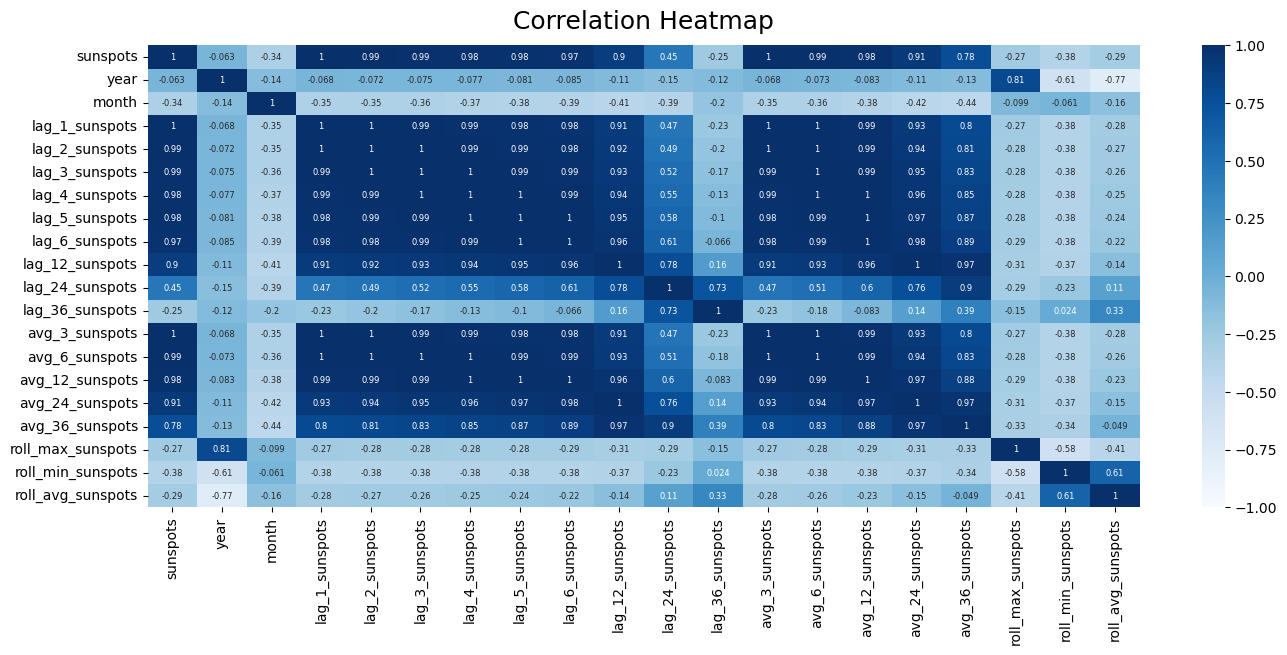

In [19]:
corr = data.corr(numeric_only=True)
# mask = np.triu(np.ones_like(corr,dtype=np.bool_))
plt.figure(figsize=(16, 6))
heatmap1 = sns.heatmap(corr.corr(), vmin=-1, vmax=1, annot=True, annot_kws={"size": 6},cmap='Blues')
heatmap1.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
plt.show()

# correlation


In [35]:
corrs = []
for i in range(120, 133):
    data = pd.read_csv(f'./data/processed_data_{i}.csv')
    corr = data.corr(numeric_only=True)[['target_sunspots']]
    corr['m'] = i
    corrs.append(corr)
corrs = pd.concat(corrs)
corrs = corrs.reset_index()
corrs.rename(columns={'index':'x_name'}, inplace=True)
corrs

,x_name,target_sunspots,m
0,sunspots,0.560943,120
1,year,0.161305,120
2,month,0.010890,120
3,lag_1_sunspots,0.568709,120
4,lag_2_sunspots,0.575656,120
...,...,...,...
268,avg_36_sunspots,0.324843,132
269,roll_max_sunspots,-0.071949,132
270,roll_min_sunspots,-0.021646,132
271,roll_avg_sunspots,-0.221803,132


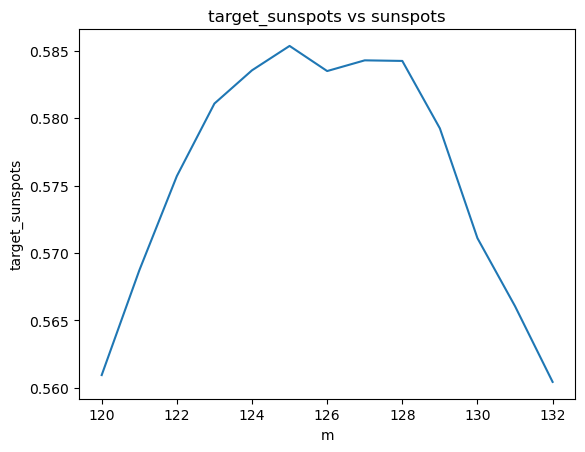

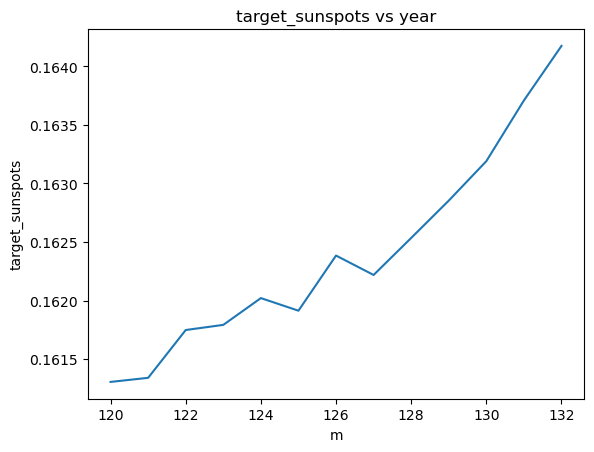

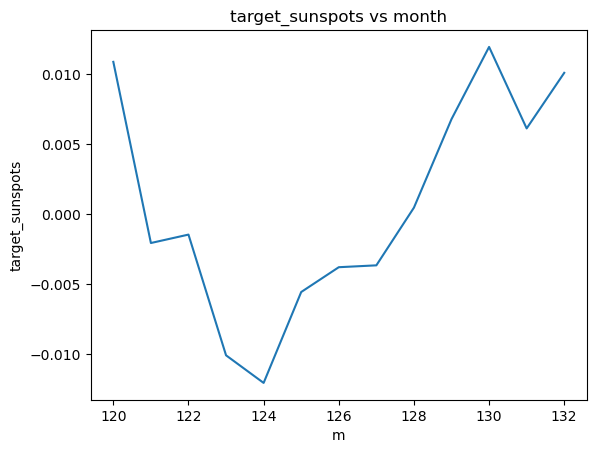

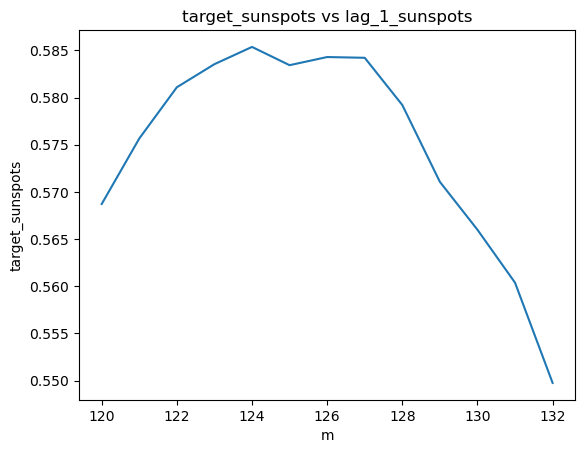

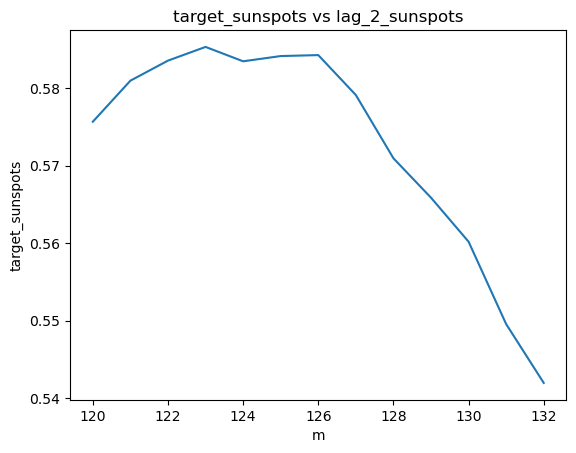

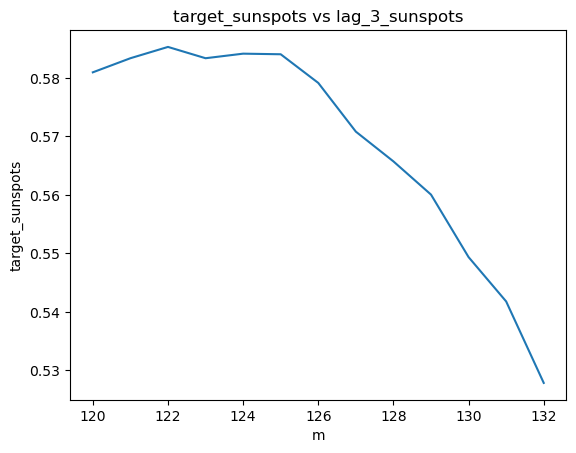

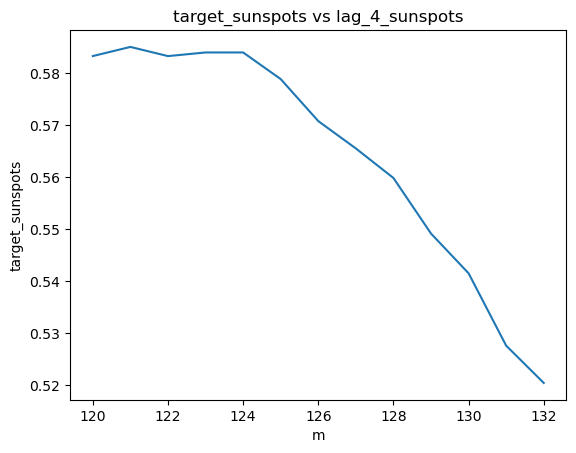

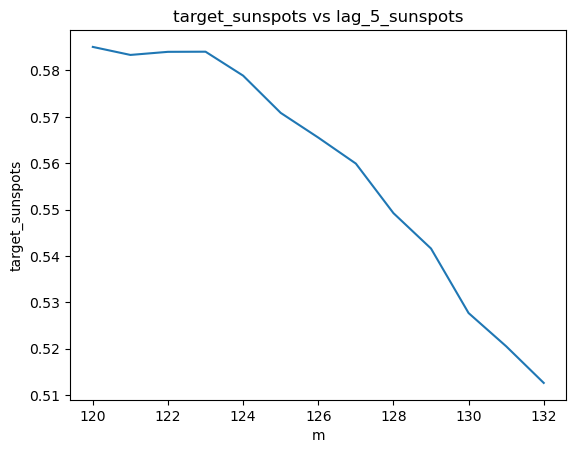

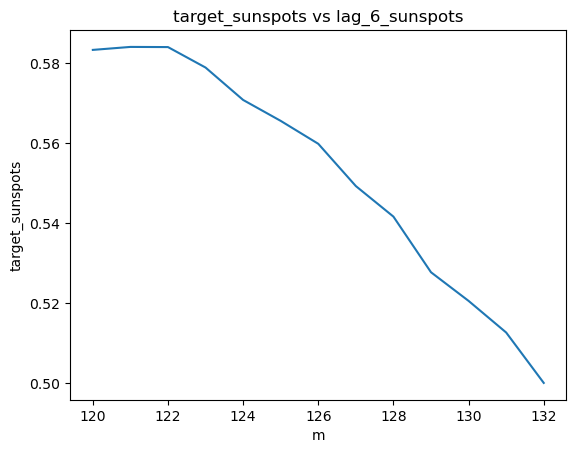

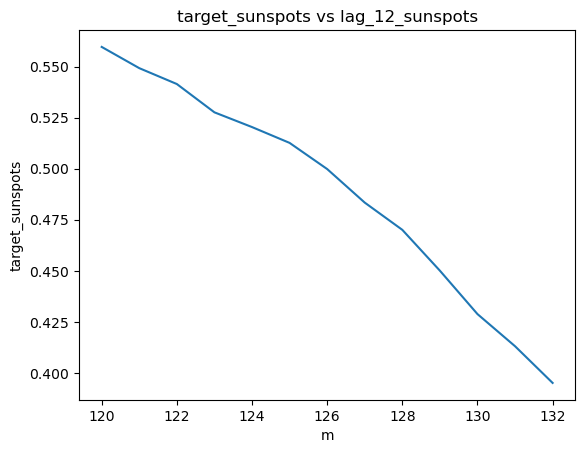

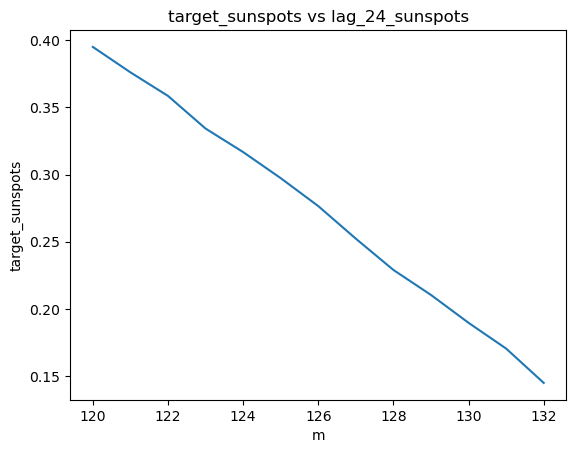

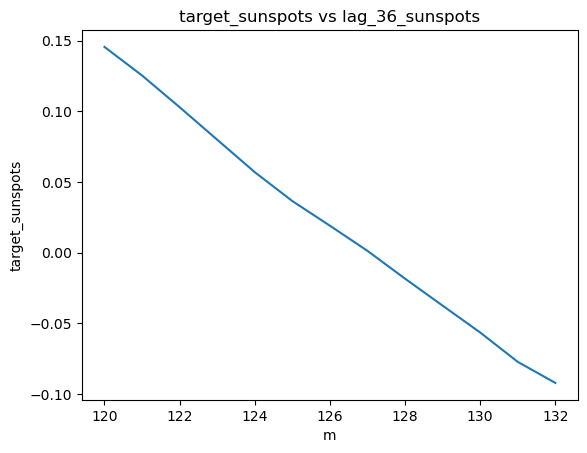

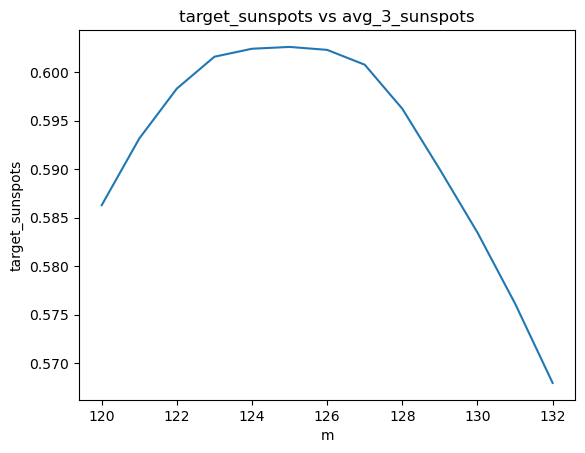

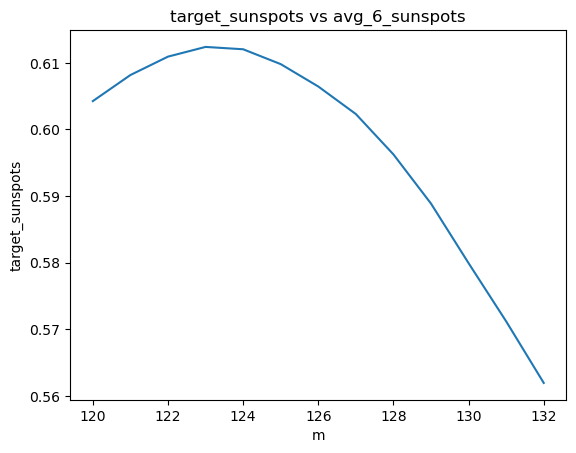

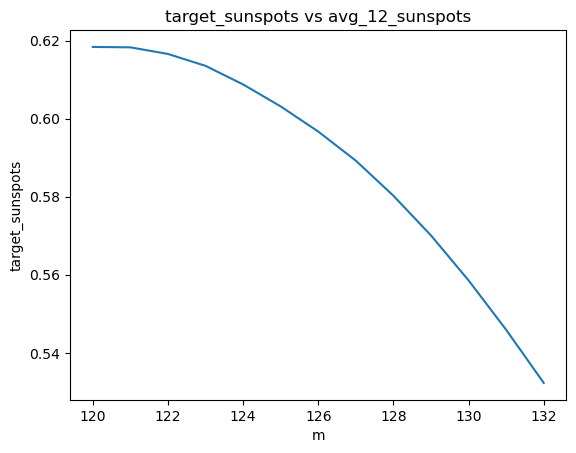

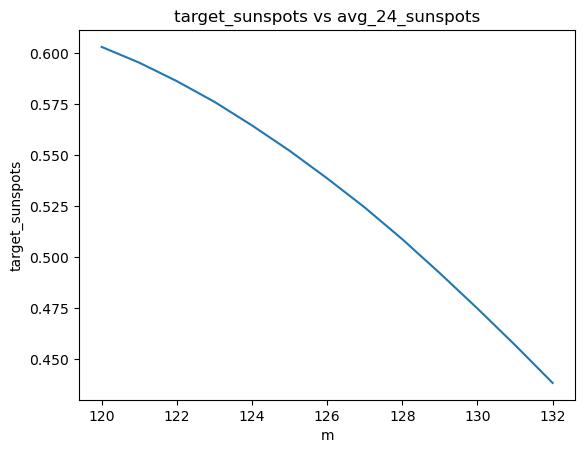

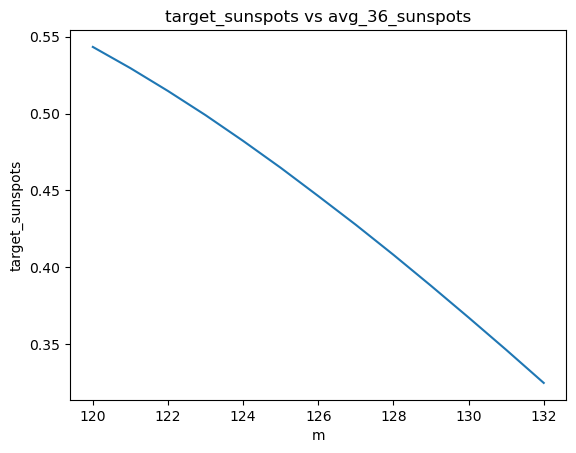

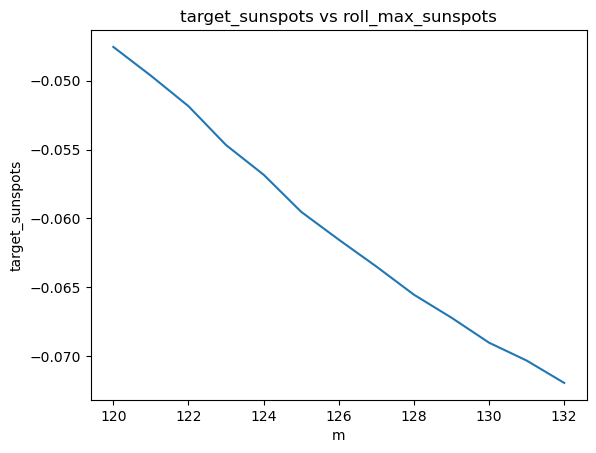

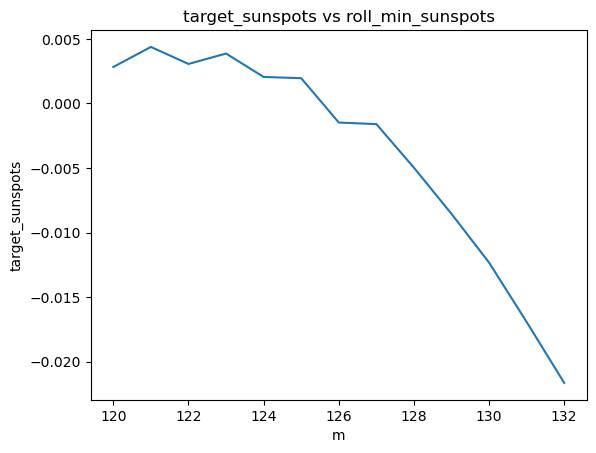

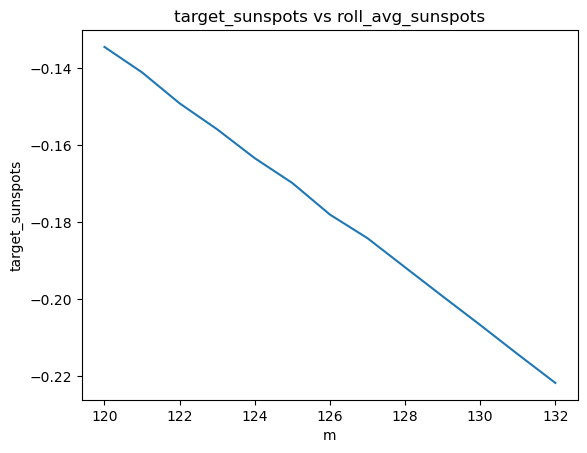

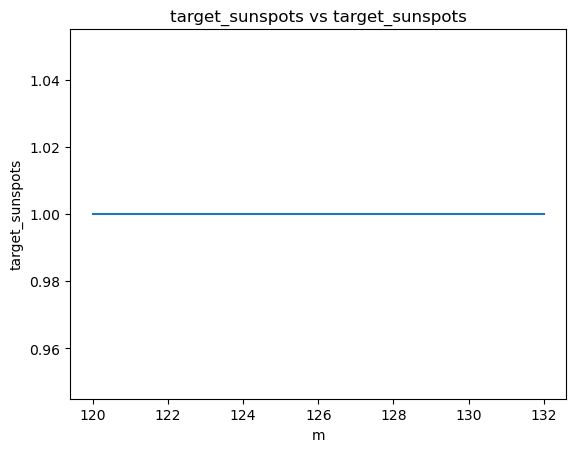

In [48]:
for x_name in corrs.x_name.unique():
    plt.clf()
    sns.lineplot(data=corrs[corrs['x_name'] == x_name], x='m', y='target_sunspots').set_title(label=f"target_sunspots vs {x_name}")
    plt.show()

<Axes: xlabel='x_name', ylabel='target_sunspots'>

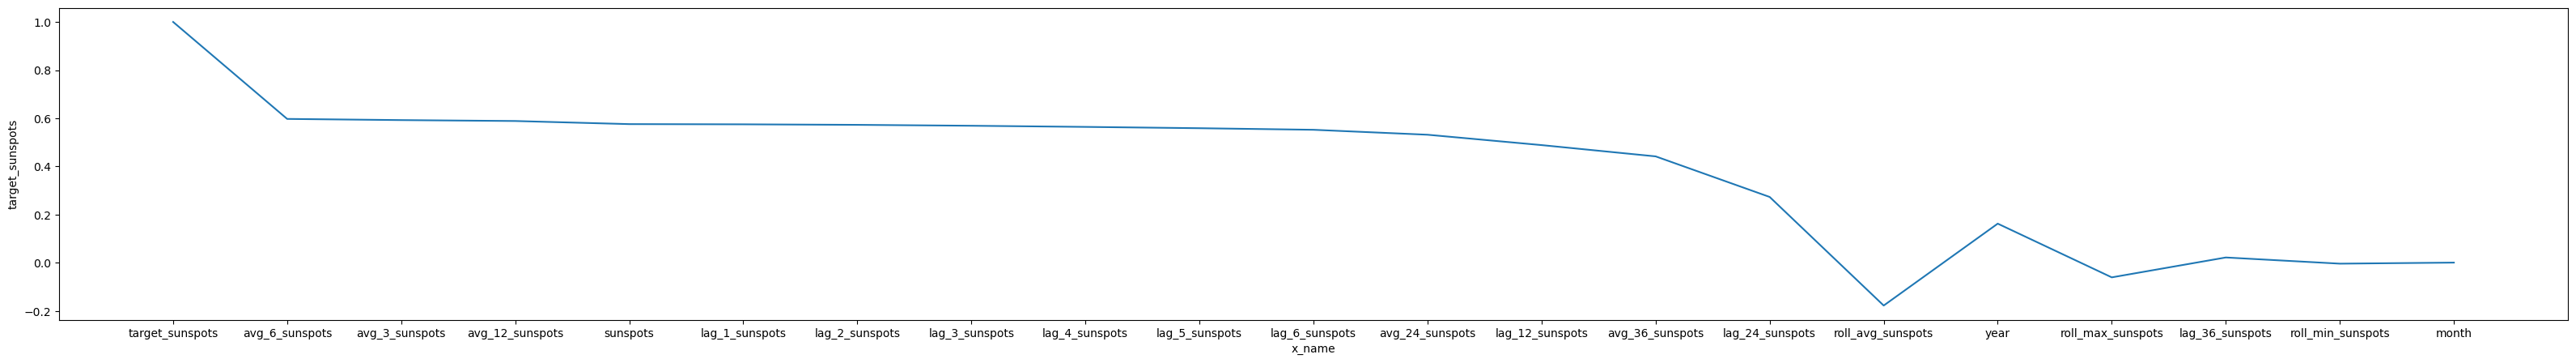

In [68]:
plt.figure(figsize=(40, 5))
avg_corrs = corrs.groupby(['x_name']).agg({'target_sunspots':'mean'}).reset_index()
avg_corrs['abs'] = np.abs(avg_corrs['target_sunspots'])
avg_corrs = avg_corrs.sort_values(by=['abs'], ascending=False)
sns.lineplot(data=avg_corrs, x='x_name', y='target_sunspots')

<Axes: xlabel='x_name', ylabel='target_sunspots'>

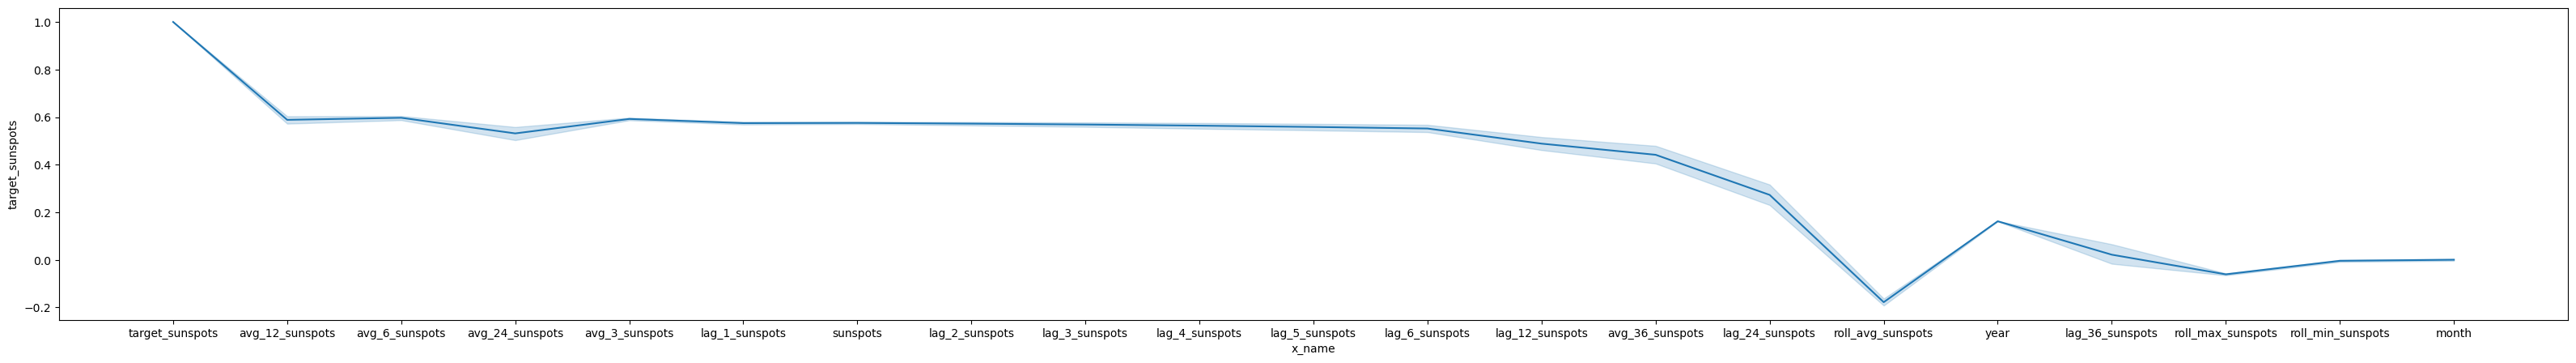

In [69]:
plt.figure(figsize=(40, 5))
corrs['abs'] = np.abs(corrs['target_sunspots'])
corrs = corrs.sort_values(by=['abs'], ascending=False)
sns.lineplot(data=corrs, x='x_name', y='target_sunspots')